In [1]:
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes
import warnings; warnings.simplefilter('ignore')

import numpy as np
import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

bank_data = pd.read_csv('bank-additional-full.csv')

C:\Users\Milos\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Handling categorical variables
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','day_of_week', 'poutcome', 'y']
bank_data_tran = pd.get_dummies(bank_data, columns = categorical_features, drop_first=True)

In [3]:
def converter(cluster):
    if cluster==1:
        return 1
    else:
        return 0

In [4]:
#kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 400, n_init = 10, random_state = 0)
#kmeans.fit(bank_data_tran)

km = KModes(n_clusters=2, init='Huang', n_init=12, verbose=1)
km.fit(bank_data_tran.drop('y_yes', axis=1))


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5420, cost: 440553.0
Run 1, iteration: 2/100, moves: 1, cost: 440553.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 6764, cost: 458091.0
Run 2, iteration: 2/100, moves: 1821, cost: 458070.0
Run 2, iteration: 3/100, moves: 3, cost: 458070.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 6383, cost: 452328.0
Run 3, iteration: 2/100, moves: 0, cost: 452328.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 9708, cost: 440544.0
Run 4, iteration: 2/100, moves: 6, cost: 440544.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 9155, cost: 448066.0
Run 5, iteration: 2/100, moves: 145, cost: 448051.0
Run 5, iteration: 3/100, moves

KModes(cat_dissim=<function matching_dissim at 0x0000021EE50642F0>,
    init='Huang', max_iter=100, n_clusters=2, n_init=12, verbose=1)

In [5]:
km.

print("SSD is :", km.cost__)

SSD is : 440544.0


In [13]:
bank_data_tran['cluster'] = bank_data_tran['y_yes'].apply(converter)

In [69]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(bank_data['cluster'],km.labels_))
print(classification_report(bank_data['cluster'],km.labels_))

[[24397 12151]
 [ 3731   909]]
             precision    recall  f1-score   support

          0       0.87      0.67      0.75     36548
          1       0.07      0.20      0.10      4640

avg / total       0.78      0.61      0.68     41188



In [59]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(bank_data_tran.values, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

AttributeError: 'KModes' object has no attribute 'cluster_centers_'

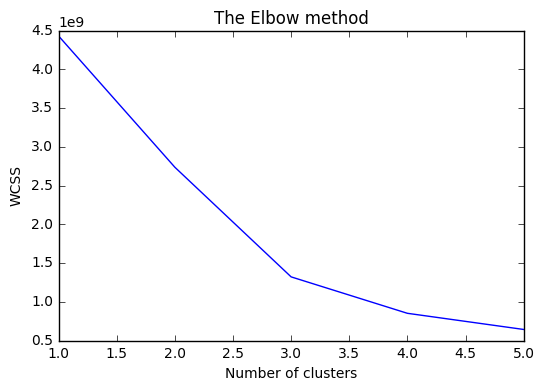

In [10]:
from sklearn.cluster import KMeans 
wcss = []

max_clusters = 6
for i in  range (1, max_clusters):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(bank_data_tran.drop('y_yes', axis=1))
    wcss.append(kmeans.inertia_)
plt.plot(range(1, max_clusters), wcss)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [16]:
means = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
means.fit(bank_data_tran.drop('y_yes', axis = 1))

means.inertia_

1320962635.8888199